<a href="https://colab.research.google.com/github/repitta/CienciaDeDadosEducacionais/blob/master/An%C3%A1lise_dos_dados_da_UFRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# These are the library we are going to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
# Notas finais
# Reading the data directly from the Git
notas_url = ["https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/notas_discentes_2017.1.csv",
            "https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/notas_discentes_2017.2.csv",
            "https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/notas_discentes_2018.1.csv",
            "https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/notas_discentes_2018.2.csv"]

lista_url = "https://raw.githubusercontent.com/repitta/CienciaDeDadosEducacionais/master/arquivosCSV/tabelaNotasListas.csv"

In [0]:
# Notas since 2017.1 until 2018.2
notas2017_1 = pd.read_csv(notas_url[0], sep=';', encoding = "ISO-8859-1" )
notas2017_2 = pd.read_csv(notas_url[1], sep=';', encoding = "ISO-8859-1" )
notas2018_1 = pd.read_csv(notas_url[2], sep=';', encoding = "ISO-8859-1" )
notas2018_2 = pd.read_csv(notas_url[3], sep=';', encoding = "ISO-8859-1" )

listas = pd.read_csv(lista_url)

In [0]:
# Setting priginal data into one vector due to easier manipulation
classes =[notas2017_1, notas2017_2,notas2018_1, notas2018_2]

In [0]:
# Adding year in each dataframe 
year = 2017 # The year we decide to start our study
for i in range(4):
  classes[i]['ano'] = year
  if i%2!=0:
    year += 1
  
# Renaming the column for better manipulation
  classes[i].rename(columns={'nome': 'disciplina'}, inplace=True)
  

In [0]:
for i in range(4):
  # Changing some columns types in this step
  classes[i].periodo   = classes[i].periodo.astype(str)
  classes[i].codigo    = classes[i].codigo.astype(str)
  classes[i].disciplina= classes[i].disciplina.astype(str)
  classes[i].turma     = classes[i].turma.astype(str)
  classes[i].siape     = classes[i].siape.astype(str)
  classes[i].horario   = classes[i].horario.astype(str)
  classes[i].matricula = classes[i].matricula.astype(int)
 #classes[i].nota      = classes[i].nota.astype(float) #Não pode converter pq os alunos indeferidos no campo nota tem o simbolo -
  classes[i].situacao  = classes[i].situacao.astype(str)
  classes[i].ano       = classes[i].ano.astype(str)

  # Filtro para os dados apenas da disciplina de Lop que o código é ECT2203 e que a turma não foi excluida
  classes[i] = classes[i][classes[i]['codigo']=="ECT2203"]
  classes[i] = classes[i][classes[i]['situacao'] !='EXCLUIDA']
  
  #Concatenar as colunas ano e periodo
  classes[i].ano = classes[i]['ano'] + "." + classes[i]['periodo']
  # transformar a tipo da coluna ano 
  classes[i].ano       = classes[i].ano.astype(float)

In [0]:
# Concatenating all classes since 2017.1 until 2018.2
merge_classes = classes[0]
for i in range(1,4):
  merge_classes = pd.concat([merge_classes, classes[i]])

In [0]:
#Ajustando a tabela das listas para concatenar com a tebala notas do sigaa
listas.rename(columns={'descricaoTurma': 'turma'}, inplace=True)
listas = listas[['matricula', 'nome', 'ano', 'turma', 'lab1', 'qLab1',
       'lab2', 'qLab2', 'lab3', 'qLab3', 'lab4', 'qLab4', 'lab5', 'qLab5',
       'exe1', 'qexe1', 'exe2', 'qexe2', 'exe3', 'qexe3', 'exe4', 'qexe4',
       'exe4.1', 'qexe4.1', 'exe5', 'qexe5']]
listas['turma'] = listas['turma'].str.slice(start=-3)

#Ajustando de notas do sigaa para concatenar com a tabela de listas no LOP
merge_classes = merge_classes[['turma', 'siape', 'horario', 'matricula', 'nota', 'situacao', 'ano']]
merge_classes['turma'] = merge_classes['turma'].str.slice(start=-3)



In [9]:
merge_classes.head()

,turma,siape,horario,matricula,nota,situacao,ano
420,11D,1763991-5,5M34 35T34 (13/02/2017 - 27/06/2017),2014085193,5.10,APROVADO POR NOTA,2017.1
481,09A,1943220-0,5M56 35T12 (13/02/2017 - 27/06/2017),20160106820,7.40,APROVADO,2017.1
524,09C,"2459504-9,1943220-0",4M56 35T12 (13/02/2017 - 27/06/2017),2016013157,6.70,APROVADO POR NOTA,2017.1
588,05C,2312423-9,6T56 35N12 (13/02/2017 - 27/06/2017),2016016257,-,CANCELADO,2017.1
596,11A,"1763991-5,2459504-9",4M34 35T34 (13/02/2017 - 27/06/2017),20150126631,1.00,REPROVADO,2017.1


In [11]:
listas.head()

,matricula,nome,ano,turma,lab1,qLab1,lab2,qLab2,lab3,qLab3,lab4,qLab4,lab5,qLab5,exe1,qexe1,exe2,qexe2,exe3,qexe3,exe4,qexe4,exe4.1,qexe4.1,exe5,qexe5
0,20170106538,ALEFF RAMON DA SILVA COSTA,2017.2,01A,0.0,1.0,10.0,5.0,4.0,2.0,6.0,3.0,4.0,3.0,0.666667,2.0,6.755556,13.0,3.993333,7.0,4.375,7.0,NaN,NaN,2.500,5.0
1,20170039453,AMANDA,2017.2,01A,10.0,5.0,10.0,5.0,10.0,5.0,10.0,5.0,10.0,5.0,7.333333,11.0,10.000000,18.0,10.000000,15.0,10.000,16.0,6.2500,5.0,10.000,16.0
2,20170044776,BRUNA ALICE OLIVEIRA DE BRUNA,2017.2,01A,4.0,2.0,2.0,1.0,2.0,1.0,4.0,2.0,2.0,1.0,1.333333,2.0,0.555556,1.0,1.333333,2.0,3.125,5.0,NaN,NaN,0.625,1.0
3,20170031473,BRUNA DE SOUZA PEREIRA,2017.2,01A,10.0,5.0,10.0,5.0,4.0,2.0,4.0,2.0,0.0,2.0,3.333333,5.0,5.555556,10.0,4.666667,7.0,2.500,4.0,NaN,NaN,0.000,2.0
4,20170032274,DAVI SIDRIM,2017.2,01A,8.0,4.0,10.0,5.0,4.0,2.0,10.0,5.0,10.0,5.0,2.666667,4.0,3.888889,7.0,4.666667,7.0,4.375,7.0,5.4125,5.0,6.250,10.0


In [0]:
#Concatenar as duas tabelas
tabelaFinal = pd.merge(merge_classes,listas,on=['matricula','ano',"turma"], how="outer")
tabelaFinal

In [19]:
#Retirar o ano de 2017.1 e 2019.1 pois tem não dados completos do sigaa e do LOP
tabelaFinal = tabelaFinal.loc[(tabelaFinal["ano"] != 2017.1) & (tabelaFinal["ano"] != 2019.1) ]
tabelaFinal

,turma,siape,horario,matricula,nota,situacao,ano,nome,lab1,qLab1,lab2,qLab2,lab3,qLab3,lab4,qLab4,lab5,qLab5,exe1,qexe1,exe2,qexe2,exe3,qexe3,exe4,qexe4,exe4.1,qexe4.1,exe5,qexe5
698,04B,"2312423-9,4687943-1",7M34 35N34 (24/07/2017 - 26/11/2017),20170031910,1.80,REPROVADO,2017.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,03C,"4687943-1,1434796-4",24M56 3T56 (24/07/2017 - 26/11/2017),2014085086,3.00,REPROVADO,2017.2,MATHEUS MEDEIROS DE SOUZA LOPES,NaN,NaN,3.2,2.0,2.00,1.0,NaN,NaN,10.0,5.0,NaN,NaN,2.205556,5.0,2.000000,3.0,0.000,1.0,NaN,NaN,9.37500,15.0
700,05D,2312423-9,6T12 35N12 (24/07/2017 - 26/11/2017),2016017512,-,INDEFERIDO,2017.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,01B,1943220-0,24M12 2T12 (24/07/2017 - 26/11/2017),20170030690,5.20,APROVADO POR NOTA,2017.2,GABRIELA GUEDES,8.0,4.0,NaN,NaN,NaN,NaN,8.0,4.0,0.0,2.0,2.666667,4.0,NaN,NaN,NaN,NaN,2.500,4.0,NaN,NaN,0.00000,2.0
702,04C,2312423-9,7M56 35N34 (24/07/2017 - 26/11/2017),20160146235,0.30,REPROVADO,2017.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
703,04B,"4687943-1,2312423-9",7M34 35N34 (24/07/2017 - 26/11/2017),2015013555,0.40,REPROVADO,2017.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,05D,2312423-9,6T12 35N12 (24/07/2017 - 26/11/2017),2016016856,-,CANCELADO,2017.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,04A,"4687943-1,2312423-9",7M12 35N34 (24/07/2017 - 26/11/2017),20170040712,9.30,APROVADO,2017.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,01B,1943220-0,24M12 2T12 (24/07/2017 - 26/11/2017),20170033772,10.00,APROVADO,2017.2,THUANNY RAMOS,10.0,5.0,10.0,5.0,10.00,5.0,10.0,5.0,10.0,5.0,5.333333,8.0,9.916667,18.0,10.000000,15.0,10.000,16.0,10.0000,8.0,8.75000,14.0
707,02C,"2459504-9,1763991-5",24M12 2T34 (24/07/2017 - 26/11/2017),20160111060,1.70,REPROVADO,2017.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


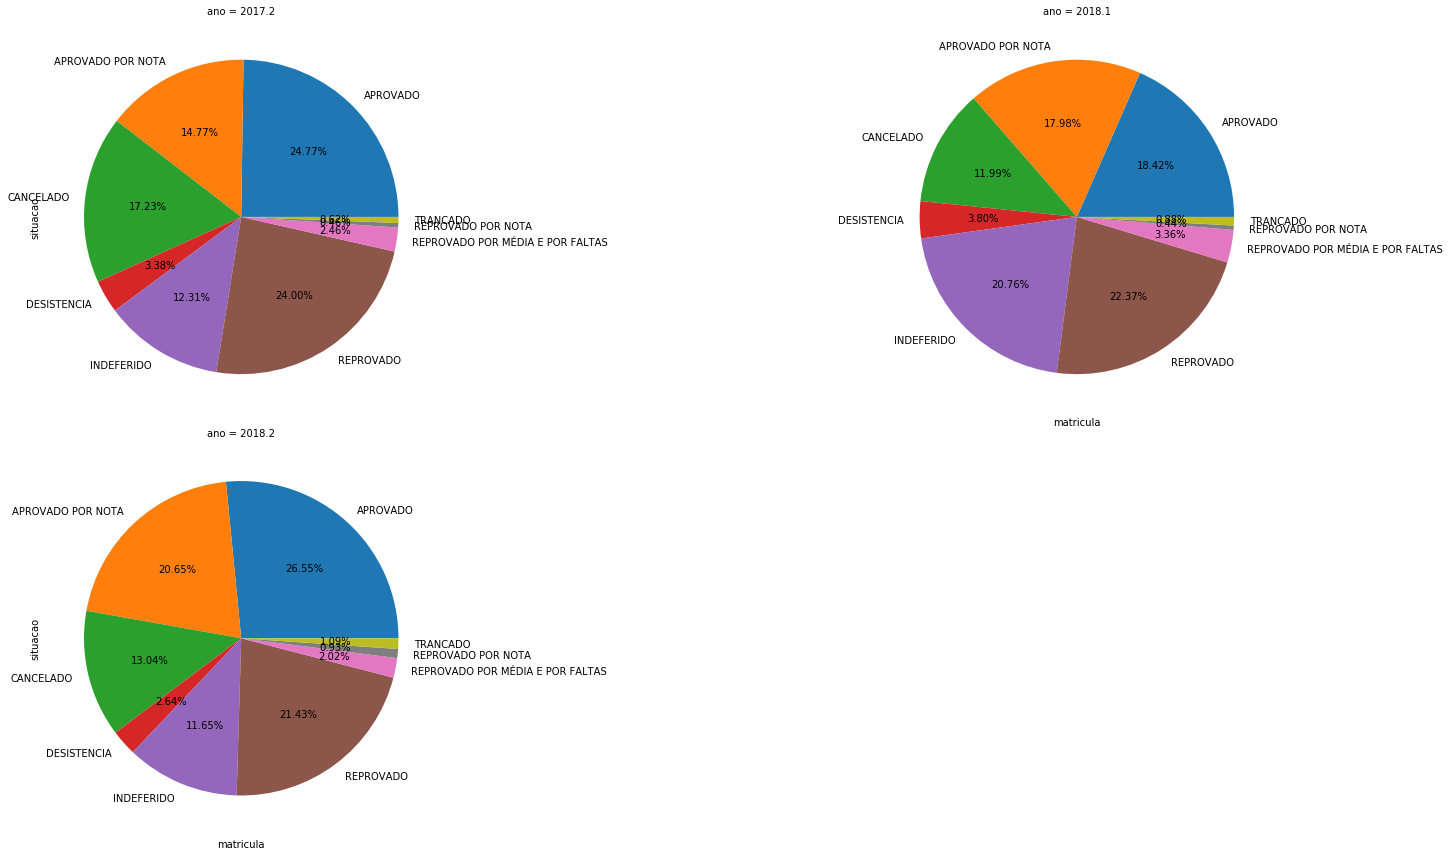

In [52]:
tabela = tabelaFinal.groupby(['ano',"situacao"])["matricula"].count()
tabela = tabela.reset_index()

# Creating graphics with Seaborn
gMediaNota = sns.FacetGrid(tabela, col = "ano", col_wrap=2, height=6, aspect=2, sharex=False)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct

def pie(v, l, color=None):
    plt.pie(v, labels=l.values, autopct='%.2f%%')
    
    
    
gMediaNota.map(pie,"matricula","situacao")

for ax in gMediaNota.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [0]:
mediaNota = lopNotasLista.groupby(['titulo','ano'])["NotaLista"].mean()
mediaNota = mediaNota.reset_index()
#print(mediaNota[["titulo",'NotaLista',"ano"]])

